# Classification
## MSDS 7349 - Section 401
## Project 2

[Data Science @ Southern Methodist University](https://datascience.smu.edu/)

# Table of Contents
* [Team Members](#Team-Members)
* [Data Preparation](#Data-Preparation)
* [Dataset Description](#Dataset-Description)
* [Evaluation Metrics Description](#Evaluation-Metrics-Description)
* [Training and Testing Splits method](#Training-Testing)
* [Classification Task](#Classification-Task)
* [Regression Task](#Regression-Task)
* [Methods of Evaluation Results](#Methods-of-Evaluation)
* [Advantages of each model](#Advantages-of-each-model)
* [Relevant Attributes](#Relevant-Attributes)
* [Deployment](#Deployment)
* [Exceptional Work](#Exceptional-Work)
* [References](#References)


# <a name="Team-Members"></a>Team Members
* [Jostein Barry-Straume](https://github.com/josteinstraume)
* [Kevin Cannon](https://github.com/kcannon2)
* [Ernesto Carrera Ruvalcaba](https://github.com/ecarrerasmu)
* [Adam Tschannen](https://github.com/adamtschannen)

# <a name="Data-Preparation"></a>Data Preparation

> [10 points] Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis.


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import statistics as st
import csv as csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from __future__ import print_function
from sklearn.preprocessing import StandardScaler


#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

filepath = "/data/credit-defaults.xls"

# Relative local path to avoid changing filepath constantly
credit = pd.read_excel('../data/credit-defaults.xls', header=1, skiprows=0)


# Rename column(s)
credit = credit.rename(columns={'default payment next month': 'default_next_m', 'PAY_0': 'PAY_1'})


In [33]:
#CREATING NEW VARIABLE TO IMPUTE THE VALUES TO 4, THAT REPRESETNS OTHER
credit['EDUCATION_INP']=credit['EDUCATION']

credit.loc[credit['EDUCATION'] > 4, 'EDUCATION_INP'] = 4
credit.loc[credit['EDUCATION'] == 0, 'EDUCATION_INP'] = 4

In [34]:
####FOR MARRIAGE
#CREATING NEW VARIABLE TO IMPUTE THE VALUES TO 2, THAT REPRESETNS SINGLE, since the value of 0 is not defined in
#the data dictionary
credit['MARRIAGE_INP']=credit['MARRIAGE']


credit.loc[credit['MARRIAGE'] == 0, 'MARRIAGE_INP'] = 2


In [35]:
########### CREATING A FUNCTION TO GROUP VARIABLES
def group_biv_v1(var_name,RangeName,CutOff,NumBins,BinLabel,var_x,var_y,title1,title2):
#def bivariate_v1(NumBins): 
    #Creating the BINS
    credit[RangeName]=pd.cut(var_name,CutOff,NumBins,labels=BinLabel)
    #Grouping by the BINS variable
    default_g=credit.groupby(by=[RangeName])
    #% of POPULATION
    bins_percentage=default_g[RangeName].count()/credit[RangeName].count()
    
    #### creating DUMMY VARIABLES
    
    
    
    

#group_biv_v1(credit.PAY_1,'PAY_1_range',[-2.1,0,1,10],3,['Pay duly','delay 1 month ','delay > 1'],'Percentage','PAY_1_bins','% of population PAY_1','Default PAY_1 ')


In [36]:
############## IMPUTE VALUES FOR THE VARIABLES OF REPAYMENT STATUS (PAY0, PAY1,   PAYN)
group_biv_v1(credit.PAY_1,'PAY_1_range',[-2.1,0,1,10],3,['Pay duly','delay 1 month ','delay > 1'],'Percentage','PAY_1_bins','% of population PAY_1','Default PAY_1 ')

group_biv_v1(credit.PAY_2,'PAY_2_range',[-2.1,1,10],2,['Pay duly','delay > 1'],'Percentage','PAY_2_bins','% of population PAY_2','Default PAY_2 ')

group_biv_v1(credit.PAY_3,'PAY_3_range',[-2.1,1,10],2,['Pay duly','delay > 1'],'Percentage','PAY_3_bins','% of population PAY_3','Default PAY_3 ')

group_biv_v1(credit.PAY_4,'PAY_4_range',[-2.1,1,10],2,['Pay duly','delay > 1'],'Percentage','PAY_4_bins','% of population PAY_4','Default PAY_4 ')

group_biv_v1(credit.PAY_5,'PAY_5_range',[-2.1,1,10],2,['Pay duly','delay > 1'],'Percentage','PAY_5_bins','% of population PAY_5','Default PAY_5 ')

group_biv_v1(credit.PAY_6,'PAY_6_range',[-2.1,1,10],2,['Pay duly','delay > 1'],'Percentage','PAY_6_bins','% of population PAY_6','Default PAY_6 ')


In [37]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT6,default_next_m,EDUCATION_INP,MARRIAGE_INP,PAY_1_range,PAY_2_range,PAY_3_range,PAY_4_range,PAY_5_range,PAY_6_range
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,1,2,1,delay > 1,delay > 1,Pay duly,Pay duly,Pay duly,Pay duly
1,2,120000,2,2,2,26,-1,2,0,0,...,2000,1,2,2,Pay duly,delay > 1,Pay duly,Pay duly,Pay duly,delay > 1
2,3,90000,2,2,2,34,0,0,0,0,...,5000,0,2,2,Pay duly,Pay duly,Pay duly,Pay duly,Pay duly,Pay duly
3,4,50000,2,2,1,37,0,0,0,0,...,1000,0,2,1,Pay duly,Pay duly,Pay duly,Pay duly,Pay duly,Pay duly
4,5,50000,1,2,1,57,-1,0,-1,0,...,679,0,2,1,Pay duly,Pay duly,Pay duly,Pay duly,Pay duly,Pay duly


In [38]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 33 columns):
ID                30000 non-null int64
LIMIT_BAL         30000 non-null int64
SEX               30000 non-null int64
EDUCATION         30000 non-null int64
MARRIAGE          30000 non-null int64
AGE               30000 non-null int64
PAY_1             30000 non-null int64
PAY_2             30000 non-null int64
PAY_3             30000 non-null int64
PAY_4             30000 non-null int64
PAY_5             30000 non-null int64
PAY_6             30000 non-null int64
BILL_AMT1         30000 non-null int64
BILL_AMT2         30000 non-null int64
BILL_AMT3         30000 non-null int64
BILL_AMT4         30000 non-null int64
BILL_AMT5         30000 non-null int64
BILL_AMT6         30000 non-null int64
PAY_AMT1          30000 non-null int64
PAY_AMT2          30000 non-null int64
PAY_AMT3          30000 non-null int64
PAY_AMT4          30000 non-null int64
PAY_AMT5          30000 non-null 

In [39]:
#### CREATE DUMMY VARIABLES
#Convert Categorical fields to bool using get_dummies
#Use drop_first=true to aviod multicolinierarity
### The drop_first=true eliminates the first group of the dummy variable
### According to the notes provided of the professor we do this to prevent multicollinearity
#### I can see it in the context of regression and logistic regression. We may want to select the group to delet
##### The method "get_dummies" also ELIMINATES THE ORIGINAL VARIABLE TO CREATE THE dummies

#EC: Creating  another reference in MEMORY, so the changes in df will not be REFLECTED IN CREDIT
df = credit.copy()



df = pd.get_dummies(data=credit, 
                       columns=['EDUCATION_INP',
                                'MARRIAGE_INP', 
                                'PAY_1_range',
                                'PAY_2_range',
                                'PAY_3_range',
                                'PAY_4_range',
                                'PAY_5_range',
                                'PAY_6_range',], drop_first=True) #Try drop_first=true to aviod multicolinierarity







df.info()

df.head()


credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 37 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_1                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [40]:
##### CREATING ADDITIONAL VARIABLES 

############## CREATING NEW VARIABLES

#average of hte bill amount
df['Avg_BILL']=(df['BILL_AMT1']+df['BILL_AMT2']+df['BILL_AMT3']+ df['BILL_AMT4']+df['BILL_AMT5']+df['BILL_AMT6']
               )/float(6)


#Average of the Payment amount

df['Avg_PAY']=(df['PAY_AMT1']+df['PAY_AMT2']+df['PAY_AMT3']+df['PAY_AMT4']+df['PAY_AMT5']+df['PAY_AMT6']
               )/float(6)

#We are constructing the ratio with the average BILL AMOUNT TO LIMIT
df['AvgBill_to_LIMIT_BAL']=(df['Avg_BILL']/df['LIMIT_BAL'])


#We are constructing the ratio with the  average PAYMENT AMOUNT TO LIMIT
df['AvgPay_to_LIMIT_BAL']=(df['Avg_PAY']/df['LIMIT_BAL'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 41 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_1                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

### Removing variables not needed in the analysis
>We will conduct one classification task and one regression task. We will create 2 different objects since we will remove different variables

> We first create the object for the classification task

In [41]:
### WE CREATE AN OBJECT FOR THE CLASSIFICATION TASK AND OTHER FOR THE REGRESSION TASK

# CREATING THE OBJECT FOR THE CLASSIFICATION TASK
class_t=df.copy()
reg_t=df.copy()

if 'default_next_m' in class_t:
    y_c = class_t['default_next_m'].values
    del class_t['default_next_m']
    del class_t['ID']
    del class_t['EDUCATION']
    del class_t['MARRIAGE']
    del class_t['PAY_1']
    del class_t['PAY_2']
    del class_t['PAY_3']
    del class_t['PAY_4']
    del class_t['PAY_5']
    del class_t['PAY_6']
    X_c = class_t.values
    
    
    

> Then we create the object for the Regression Task

In [42]:
### WE CREATE AN OBJECT FOR THE CLASSIFICATION TASK AND OTHER FOR THE REGRESSION TASK

# CREATING THE OBJECT FOR THE REGRESSION  TASK

reg_t=df.copy()


if 'default_next_m' in reg_t:
    y_r = reg_t['default_next_m'].values
    del reg_t['default_next_m']
    del reg_t['ID']
    del reg_t['EDUCATION']
    del reg_t['MARRIAGE']
    del reg_t['PAY_1']
    del reg_t['PAY_2']
    del reg_t['PAY_3']
    del reg_t['PAY_4']
    del reg_t['PAY_5']
    del reg_t['PAY_6']
    del reg_t['Avg_BILL']
    del reg_t['LIMIT_BAL']
    del reg_t['AvgPay_to_LIMIT_BAL']
    del reg_t['BILL_AMT1']
    del reg_t['BILL_AMT2']
    del reg_t['BILL_AMT3']
    del reg_t['BILL_AMT4']
    del reg_t['BILL_AMT5']
    del reg_t['BILL_AMT6']
    X_r = reg_t.values

# <a name="Dataset-Description"></a>Dataset Description

>[5 points] Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).

### Dataset Description for the classification task

### Dataset Description for the Regression task

# <a name="Evaluation-Metrics-Description"></a>Evaluation Metrics Description


>[10 points] Choose and explain your evaluation metrics that you will use (i.e., accuracy,
precision, recall, F-measure, or any metric we have discussed). Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions.

# <a name="Training-Testing"></a>Training and Testing Splits method

>[10 points] Choose the method you will use for dividing your data into training and testing splits 
(i.e., are you using Stratified 10-fold cross validation? Why?). Explain why your chosen method is 
appropriate or use more than one method as appropriate. For example, 
if you are using time series data then you should be using continuous training and testing sets across time.


# <a name="Classification-Task"></a>Classification Task

> [20 points] Create three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms!

# <a name="Regression-Task"></a>Regression Task

>[20 points] Create three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms!

# <a name="Methods-of-Evaluation"></a>Methods of Evaluation Results

> [10 points] Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.




# <a name="Advantages-of-each-model"></a>Advantages of each model
>[10 points] Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the cours


# <a name="Relevant-Attributes"></a>Relevant Attributes
>[10 points] Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task


# <a name="Deployment"></a>Deployment
>[5 points] How useful is your model for interested parties (i.e., the companies or organizations
that might want to use it for prediction)? How would you measure the model's value if it was used by these parties? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?

# <a name="Exceptional-Work"></a>Exceptional Work
> [10 points] You have free reign to provide additional analyses
> One idea: grid search parameters in a parallelized fashion and visualize the
performances across attributes. Which parameters are most significant for making a good model for each classification algorithm?

# <a name="Training-and-Testing-Split"></a>Training and Testing Split

## Stratified K-Folds Cross-Validation

> There is a very apparent class imbalance within the dataset. In order to address this issue, stratified K-Folds cross-validation will be employed to preserve the percentage of samples for each class. In other words, this will prevent the model from simply guessing 'paid duly' for each observation.

In [7]:
#df = credit
#EC: Creating  another reference in MEMORY, so the changes in df will not be REFLECTED IN CREDIT
#df = credit.copy()
from sklearn.model_selection import StratifiedShuffleSplit
if 'default_next_m' in df:
    y = df['default_next_m'].values
    del df['default_next_m']
    del df['ID']
    del df['EDUCATION']
    del df['MARRIAGE']
    X = df.values
num_cv_iterations = 3
num_instances = len(y)
cv_object = StratifiedShuffleSplit(n_splits = num_cv_iterations, 
                            test_size = 0.20, train_size = 0.80, random_state=1)
cv_object.get_n_splits(X, y)
print(cv_object)
for train_index, test_index in cv_object.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

StratifiedShuffleSplit(n_splits=3, random_state=1, test_size=0.2,
            train_size=0.8)
TRAIN: [10029 17540 20357 ..., 13713 29455 19840] TEST: [24380  2508 10431 ...,  1932 21845  7320]
TRAIN: [22092 12043 19732 ...,  9586 11830 13420] TEST: [10358  2644  6721 ..., 11354 22402 18779]
TRAIN: [20650 10967 12984 ...,  1273 16044 28263] TEST: [23855 28179 26087 ..., 11323 26267  1297]


In [8]:
print('# of obs in train set: ' + str(len(y_train)))
print('# of obs in test set: ' + str(len(y_test)))

#train_defaults = sum(y_train == 0)
train_defaults = sum(y_train == 1)
print('# of defaults in train set: ' + str(train_defaults))

proportion_train_defaults = train_defaults / len(y_train)
print('Proportion of defaults in train set: ' + str(proportion_train_defaults))

#test_defaults = sum(y_test == 0)
test_defaults = sum(y_test == 1)
print('# of defaults in test set: ' + str(test_defaults))

proportion_test_defaults = test_defaults / len(y_test)
print('Proportion of defaults in test set: ' + str(proportion_test_defaults))

# of obs in train set: 24000
# of obs in test set: 6000
# of defaults in train set: 5309
Proportion of defaults in train set: 0.221208333333
# of defaults in test set: 1327
Proportion of defaults in test set: 0.221166666667


In [10]:
print('# of obs in train set: ' + str(len(y_train)))
print('# of obs in test set: ' + str(len(y_test)))

#train_defaults = sum(y_train == 0)
train_defaults = sum(y_train == 1)
print('# of defaults in train set: ' + str(train_defaults))

proportion_train_defaults = train_defaults / len(y_train)
print('Proportion of defaults in train set: ' + str(proportion_train_defaults))

#test_defaults = sum(y_test == 0)
test_defaults = sum(y_test == 1)
print('# of defaults in test set: ' + str(test_defaults))

proportion_test_defaults = test_defaults / len(y_test)
print('Proportion of defaults in test set: ' + str(proportion_test_defaults))

# of obs in train set: 24000
# of obs in test set: 6000
# of defaults in train set: 5309
Proportion of defaults in train set: 0.221208333333
# of defaults in test set: 1327
Proportion of defaults in test set: 0.221166666667


In [13]:
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from IPython.html import widgets 
from sklearn.metrics import accuracy_score 
from sklearn import metrics as mt


max_accs = 0
max_k = 0

for k in range(5,15):
    clf = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric='cosine')
    clf.fit(X_train, y_train)
    yhat = clf.predict(X_test)
    acc = mt.accuracy_score(y_test,yhat)
    if max(max_accs, acc) == acc:
        max_accs = acc
        max_k = k
    print('Accuracy of', k, 'neighbors is', acc * 100, '%')

print('\nThe best accuracy is %f with %d neighbor(s)'%(max_accs,max_k))

Accuracy of 5 neighbors is 76.3166666667 %
Accuracy of 6 neighbors is 77.6 %
Accuracy of 7 neighbors is 77.1333333333 %
Accuracy of 8 neighbors is 78.0666666667 %
Accuracy of 9 neighbors is 77.6666666667 %
Accuracy of 10 neighbors is 78.2333333333 %
Accuracy of 11 neighbors is 77.8333333333 %
Accuracy of 12 neighbors is 78.0333333333 %
Accuracy of 13 neighbors is 78.05 %
Accuracy of 14 neighbors is 78.0666666667 %

The best accuracy is 0.782333 with 10 neighbor(s)


In [16]:
from sklearn.neighbors.nearest_centroid import NearestCentroid

for d in ['l1','l2','cosine']:
    clf = NearestCentroid(metric=d)
    clf.fit(X_train, y_train)
    yhat = clf.predict(X_test)
    acc = mt.accuracy_score(y_test,yhat)
    print('\nAccuracy of', d, 'metrics is', acc * 100, '%')    
    print('The best distance metric is: ', d)


Accuracy of l1 metrics is 53.6 %
The best distance metric is:  l1

Accuracy of l2 metrics is 54.1666666667 %
The best distance metric is:  l2

Accuracy of cosine metrics is 55.35 %
The best distance metric is:  cosine


In [8]:
#%%time
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_next_m', 'EDUCATION_INP', 'MARRIAGE_INP'],
      dtype='object')

In [9]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'EDUCATION_INP', 'MARRIAGE_INP'],
      dtype='object')

# <a name="Logistic-Regression"></a>Logistic Regression

> We first run a logistic regression scenario using l2 normal penalty, a cost of 1 and assigning the same weight to the classes in the data.

>Given the fact that the data is unbalanced, we are presenting the metrics derived from the confusion matrix (e.g. Precision, Recall, f1-score). A higher value of the metric "Recall" indicates that the model is predicting most defaults customers correctly.

>Additionally, it is measured the time to fit and train the model to determine the cost of execution.

>The performance of this first configuration is very poor since the "Recall" value for the category 1 (defaulted customers) is 0.

In [10]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from time import time

# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None) # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
times_rec=[]
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    
    #we count the time in executing the logistic regression
    t0 = time()
    
    # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions
    
    t1=time()
    diff=np.array([t1-t0])
    
    print ("The time it takes to fit and predict is " + str(diff[0]) + "\n")    
    times_rec=np.append(times_rec,diff)
    
    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1
    print("\n *** CLASSIFICATION REPORT ****")
    #### CLASSIFICATION REPORT
    ClassReport = mt.classification_report(y_test,y_hat)
    print(ClassReport)
    
    
print("The average time to fit and predict 3 logistic regressions with 80/20 training/test split is: " + str(times_rec.mean()) )

The time it takes to fit and predict is 1.34087491035

====Iteration 0  ====
accuracy 0.7785
confusion matrix
 [[4671    2]
 [1327    0]]

 *** CLASSIFICATION REPORT ****
             precision    recall  f1-score   support

          0       0.78      1.00      0.88      4673
          1       0.00      0.00      0.00      1327

avg / total       0.61      0.78      0.68      6000

The time it takes to fit and predict is 1.17583584785

====Iteration 1  ====
accuracy 0.778666666667
confusion matrix
 [[4672    1]
 [1327    0]]

 *** CLASSIFICATION REPORT ****
             precision    recall  f1-score   support

          0       0.78      1.00      0.88      4673
          1       0.00      0.00      0.00      1327

avg / total       0.61      0.78      0.68      6000

The time it takes to fit and predict is 0.998303890228

====Iteration 2  ====
accuracy 0.778833333333
confusion matrix
 [[4673    0]
 [1327    0]]

 *** CLASSIFICATION REPORT ****
             precision    recall  f1-sco

# <a name="Adjust-Parameters-LR"></a>Adjust Parameters for Logistic Regression

> Let's adjust some parameters to see if a more accurate model can be produced.

> By default, the LogisticRegression function within the SciKit Library gives all classes a weight of one. The class_weight parameter will be changed to 'balanced' to see if the accuracy of the models can be improved.

> The results that follow, show an improvement in the performance, the "Recall" value is higher than 0.5, which is deemed adequate for this problem.

In [11]:
lr_clf = LogisticRegression(penalty='l2', C=1, class_weight='balanced') # get object
#WARNING: THE FIRST WIEGHT WAS 1 
iter_num=0
times_rec=[]
for train_indices, test_indices in cv_object.split(X,y): 
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
     #we count the time in executing the logistic regression
    t0 = time()
    
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions
    
    t1=time()
    diff=np.array([t1-t0])
    
    print ("The time it takes to fit and predict is " + str(diff[0]) + "\n")    
    times_rec=np.append(times_rec,diff)
    

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    
    print("\n *** CLASSIFICATION REPORT ****")
    #### CLASSIFICATION REPORT
    ClassReport = mt.classification_report(y_test,y_hat)
    print(ClassReport)
    
    iter_num+=1
    
    
print("The average time to fit and predict 3 logistic regressions with 80/20 training/test split is: " + str(times_rec.mean()) )

The time it takes to fit and predict is 1.32330513

====Iteration 0  ====
accuracy 0.676166666667
confusion matrix
 [[3235 1438]
 [ 505  822]]

 *** CLASSIFICATION REPORT ****
             precision    recall  f1-score   support

          0       0.86      0.69      0.77      4673
          1       0.36      0.62      0.46      1327

avg / total       0.75      0.68      0.70      6000

The time it takes to fit and predict is 1.23069000244

====Iteration 1  ====
accuracy 0.646166666667
confusion matrix
 [[3089 1584]
 [ 539  788]]

 *** CLASSIFICATION REPORT ****
             precision    recall  f1-score   support

          0       0.85      0.66      0.74      4673
          1       0.33      0.59      0.43      1327

avg / total       0.74      0.65      0.67      6000

The time it takes to fit and predict is 1.59818077087

====Iteration 2  ====
accuracy 0.6605
confusion matrix
 [[3094 1579]
 [ 458  869]]

 *** CLASSIFICATION REPORT ****
             precision    recall  f1-score  

> Now, we will change the normal penalty to be L1 and assigning the same weight to the categories by setting the parameter "class_weight" to "None.

> By default, the LogisticRegression function within the SciKit Learn library uses 'L2' as its 'penalty' parameter. A binary class L2 penalized logistic regression minimizes the following cost function:

In [12]:
from IPython.display import Image
Image(url='http://scikit-learn.org/stable/_images/math/760c999ccbc78b72d2a91186ba55ce37f0d2cf37.png')

> Now the 'penalty' parameter will be changed to L1 in order to optimize the following problem:

In [13]:
Image(url='http://scikit-learn.org/stable/_images/math/6a0bcf21baaeb0c2b879ab74fe333c0aab0d6ae6.png')

In [14]:
lr_clf = LogisticRegression(penalty='l1', C=1.0, class_weight=None) # get object

iter_num=0
times_rec=[]


for train_indices, test_indices in cv_object.split(X,y): 
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    
    #we count the time in executing the logistic regression
    t0 = time()
    
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions
    
    t1=time()
    diff=np.array([t1-t0])
    
    print ("The time it takes to fit and predict is " + str(diff[0]) + "\n")    
    times_rec=np.append(times_rec,diff)
    

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    
    print("\n *** CLASSIFICATION REPORT ****")
    #### CLASSIFICATION REPORT
    ClassReport = mt.classification_report(y_test,y_hat)
    print(ClassReport)
    iter_num+=1
    
print("The average time to fit and predict 3 logistic regressions with 80/20 training/test split is: " + str(times_rec.mean()) )

The time it takes to fit and predict is 0.551182031631

====Iteration 0  ====
accuracy 0.81
confusion matrix
 [[4549  124]
 [1016  311]]

 *** CLASSIFICATION REPORT ****
             precision    recall  f1-score   support

          0       0.82      0.97      0.89      4673
          1       0.71      0.23      0.35      1327

avg / total       0.79      0.81      0.77      6000

The time it takes to fit and predict is 0.464088916779

====Iteration 1  ====
accuracy 0.8095
confusion matrix
 [[4538  135]
 [1008  319]]

 *** CLASSIFICATION REPORT ****
             precision    recall  f1-score   support

          0       0.82      0.97      0.89      4673
          1       0.70      0.24      0.36      1327

avg / total       0.79      0.81      0.77      6000

The time it takes to fit and predict is 0.505691289902

====Iteration 2  ====
accuracy 0.813
confusion matrix
 [[4560  113]
 [1009  318]]

 *** CLASSIFICATION REPORT ****
             precision    recall  f1-score   support

   

> The use of L1 penalty did not improve the performance of the model since the value of "Recall" metric decreased. 

> Therefore, the best scenario tested at this point is using L2 normal penalty and setting the class_weight parameter to be “balanced”. The latter uses the values of response variable to automatically adjust weights inversely proportional to class frequencies in the input data


# <a name="Interpreting-Weights"></a>Interpreting Weights

In [15]:
# and here is an even shorter way of getting the accuracies for each training and test set
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(lr_clf, X, y=y, cv=cv_object) # this also can help with parallelism
print(accuracies)


# here we can change some of the parameters interactively
from ipywidgets import widgets as wd

def lr_explor(cost):
    lr_clf = LogisticRegression(penalty='l2', C=cost, class_weight='balanced') # get object
    accuracies = cross_val_score(lr_clf,X,y=y,cv=cv_object) # this also can help with parallelism
    print(accuracies)

    #WARNING=cost=(0.001,5.0,0.05)
wd.interact(lr_explor,cost=(0.001,5.0,0.05),__manual=True)


# interpret the weights

# iterate over the coefficients
weights = lr_clf.coef_.T # take transpose to make a column vector
variable_names = df.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])

[ 0.81    0.8095  0.813 ]


A Jupyter Widget

LIMIT_BAL has weight of -7.37786905546e-07
SEX has weight of -0.106053514341
AGE has weight of 0.00724341162499
PAY_1 has weight of 0.588672865548
PAY_2 has weight of 0.054184270252
PAY_3 has weight of 0.0846198620851
PAY_4 has weight of 0.00918660855435
PAY_5 has weight of 0.0359400274746
PAY_6 has weight of 0.0290397644058
BILL_AMT1 has weight of -5.51985062786e-06
BILL_AMT2 has weight of 3.40682484221e-06
BILL_AMT3 has weight of 5.18112102741e-07
BILL_AMT4 has weight of 1.41428698271e-06
BILL_AMT5 has weight of -1.46807849532e-06
BILL_AMT6 has weight of 4.69803853235e-07
PAY_AMT1 has weight of -1.73718026445e-05
PAY_AMT2 has weight of -7.3575013735e-06
PAY_AMT3 has weight of -3.68879305577e-06
PAY_AMT4 has weight of -1.65893976909e-06
PAY_AMT5 has weight of -2.72880711536e-06
PAY_AMT6 has weight of -1.58658500646e-06
EDUCATION_INP has weight of -0.0989491529664
MARRIAGE_INP has weight of -0.163727659611


> These weight interpretations are not necessarily interpretable because of the values we had. Very large attribute values could just as easily be assigned a higher weight. Instead, let's normalize the feature values so that all the attributes are on the same dynamic range. Once we normalize the attributes, the weights should have magnitudes that reflect their predictive power in the logistic regression model.

In [16]:
from sklearn.preprocessing import StandardScaler

# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
##    X_train , y_train , X_test, y_test (they were set in a for loop above)

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=1, class_weight='balanced') # get object, the 'C' value is less (can you guess why??)
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,df.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

accuracy: 0.69
[[3284 1389]
 [ 471  856]]
BILL_AMT1 has weight of -0.374649398564
PAY_AMT1 has weight of -0.262814724805
PAY_AMT2 has weight of -0.149981769741
LIMIT_BAL has weight of -0.0982022503934
MARRIAGE_INP has weight of -0.0819311080116
BILL_AMT5 has weight of -0.0752249404331
EDUCATION_INP has weight of -0.0666072026459
SEX has weight of -0.0539986548809
PAY_AMT3 has weight of -0.0514898412435
PAY_AMT5 has weight of -0.0362627540843
PAY_AMT4 has weight of -0.0253744962584
PAY_AMT6 has weight of -0.0217869630015
BILL_AMT6 has weight of 0.00284234524141
PAY_4 has weight of 0.00459520490125
PAY_6 has weight of 0.00598116441579
PAY_5 has weight of 0.0337073337868
BILL_AMT3 has weight of 0.0518153248625
BILL_AMT4 has weight of 0.0689899151578
AGE has weight of 0.0732561227721
PAY_2 has weight of 0.0736470020761
PAY_3 has weight of 0.0980693683837
BILL_AMT2 has weight of 0.222891699246
PAY_1 has weight of 0.584867500528


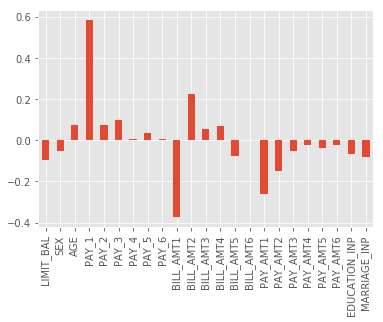

In [17]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr_clf.coef_[0],index=df.columns)
weights.plot(kind='bar')
plt.show()

In [18]:
from pydoc import help
from scipy.stats.stats import pearsonr

#correlation with in like variables 
bill = pearsonr(credit.BILL_AMT1, credit.BILL_AMT2)
pay = pearsonr(credit.PAY_AMT1, credit.PAY_AMT2)


print('bill amount correlation:', bill)
print('pay amount correlation:', pay)

bill amount correlation: (0.95148367275181633, 0.0)
pay amount correlation: (0.28557552868684272, 0.0)



> For more improvement and guarding against overfitting: At this point it make sense to remove variables highly related to one another and irrelevant ones and keep going with the weights analysis.

> Initally only a handful of the explanatory variables seem to be worth keeping in the model. In particular, PAY_1, BILL_AMT1, BILL_AMT2, PAY_AMT1 and PAY_AMT2 have the greatest absolute weights. After taking a look at the correlations between BILL_AMT1 and BILL_AMT2 , with a correlation above .95, we can delete BILL_AMT2 to prevent over fitting. Like wise, we can keep both PAY_AMT1 and PAY_AMT2 becasue of the low correlation of .285.




In [19]:
#correlation with response variable
gender = pearsonr(credit.SEX, credit.default_next_m)
Marrige = pearsonr(credit.MARRIAGE_INP, credit.default_next_m)
age = pearsonr(credit.AGE, credit.default_next_m)
education = pearsonr(credit.EDUCATION_INP, credit.default_next_m)
#billD = pearsonr(credit.BILL_AMT1, credit.default_next_m)
#payD1 = pearsonr(credit.PAY_AMT1, credit.default_next_m)
#payD2 = pearsonr(credit.PAY_AMT2, credit.default_next_m)
print('age default correlation:', age)
print('marrige default correlation:', Marrige)
print('gender default correlation:', gender)
print('education default correlation:', education)
#print('bill default correlation:', billD)
#print('pay1 default correlation:', payD1)
#print('pay2 default correlation:', payD2)




age default correlation: (0.013889834301963198, 0.016136845890286453)
marrige default correlation: (-0.02667216956912823, 3.8302915196419356e-06)
gender default correlation: (-0.039960577705441529, 4.3952488033187112e-12)
education default correlation: (0.0338422298256758, 4.5435584049859278e-09)


> Furthermore, Education, Marriage, Age and Sex appears to have only marginal significance in the model, but it could be argued to keep them in the model if all redundant PAY_X, BILL_AMTX, and PAY_AMTX variables are being removed. The argument to keep these variables in the model would be to help classify people before they have a payment or bill history with the company. For instance, a company could offer customer different products or marketing campaigns based on categories they would fall in if we used the attributes in our model.

> After taking a further look at these "profiling" features, if seems reasonable to keep the top two features with the highest weights, Marriage and Education, in our model.


In [ ]:
from sklearn.preprocessing import StandardScaler
# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)

from sklearn.pipeline import Pipeline
# you can apply the StandardScaler function inside of the cross-validation loop 
#  but this requires the use of PipeLines in scikit. 
#  A pipeline can apply feature pre-processing and data fitting in one compact notation
#  Here is an example!

std_scl = StandardScaler()
lr_clf = LogisticRegression(penalty='l2', C=1, class_weight='balanced') 

# create the pipline
piped_object = Pipeline([('scale', std_scl),  # do this
                         ('logit_model', lr_clf)]) # and then do this

weights = []
# run the pipline cross validated
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    piped_object.fit(X[train_indices],y[train_indices])  # train object
    # it is a little odd getting trained objects from a  pipeline:
    weights.append(piped_object.named_steps['logit_model'].coef_[0])
    

weights = np.array(weights)

In [ ]:
#from plotly import __version__
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#plotly.offline.init_notebook_mode() # run at the start of every notebook

import plotly
import plotly.plotly as py
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
print("Plotly version: " + plotly.__version__)           # version 1.9.x required
plotly.offline.init_notebook_mode() # run at the start of every notebook

error_y=dict(
            type='data',
            array=np.std(weights,axis=0),
            visible=True
        )

graph1 = {'x': df.columns,
          'y': np.mean(weights,axis=0),
    'error_y':error_y,
       'type': 'bar'}

fig = dict()
fig['data'] = [graph1]
fig['layout'] = {'title': 'Logistic Regression Weights, with error bars'}

plotly.offline.iplot(fig)

In [ ]:
Xnew = df[['PAY_1','BILL_AMT1','PAY_AMT1','PAY_AMT2','EDUCATION_INP','MARRIAGE_INP']].values

weights = []
# run the pipline corssvalidated
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(Xnew,y)):
    piped_object.fit(Xnew[train_indices],y[train_indices])  # train object
    weights.append(piped_object.named_steps['logit_model'].coef_[0])
    
weights = np.array(weights)

error_y=dict(
            type='data',
            array=np.std(weights,axis=0),
            visible=True
        )

graph1 = {'x': ['PAY_1','BILL_AMT1','PAY_AMT1','PAY_AMT2','EDUCATION_INP','MARRIAGE_INP'],
          'y': np.mean(weights,axis=0),
    'error_y':error_y,
       'type': 'bar'}

fig = dict()
fig['data'] = [graph1]
fig['layout'] = {'title': 'Logistic Regression Weights, with error bars'}

plotly.offline.iplot(fig)

> At first glance one might think each bill and payment period should have equal weight within the logistic regression model. However, clearly the first bill and payment period have the most significance upon viewing the above plots. Perhaps the greater weight of the first period compared to the other five can be explained by the recency of the period. 

> Simply put, if a customer fails to pay their credit bill in the first opportunity to pay, they are marked as having defaulted in the dataset. In other words, if a customer is likely to default on their bills, then the first chance for said customer is the first period.

> If a customer has paid duly for periods 1-5, then they are likely to also pay their credit bill on the 6th go around, thus exhibiting they are fiscally sound as a customer.


# <a name="Support-Vector-Machines"></a>Support Vector Machines

In [ ]:
from IPython.display import Image
# Big Data, in all its glory:
Image(url='http://flowingdata.com/wp-content/uploads/2014/11/Big-Data-620x465.jpg')

>In this section, we will explore different configurations of SVM to derive a model to classify defaulted and non-defaulted customers.

> As we did for the logistic regression, we are presenting the metrics derived from the confusion matrix (e.g. Precision, Recall, f1-score) since our data in unbalanced. A higher value of the metric "Recall" indicates that the model is predicting most defaults customers correctly. Lastly, the time to fit and predict is also measured.

>The first configuration tested uses a "linear" kernel with a cost of 0.5 (C-parameter) a degree of 3 and gamma set to auto.

>According to sklearn documentation:

>Intuitively, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

>The C parameter trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly by giving the model freedom to select more samples as support vectors

In [ ]:
# okay, so run through the cross validation loop and set the training and testing variable for one single iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test)

In [ ]:
# lets investigate SVMs on the data and play with the parameters and kernels - CHANGING THE KERNEL TO BE LINEAR
from sklearn.svm import SVC

# train the model just as before
#warning
#svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') # get object
svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto') # get object

#we count the time in executing the logistic regression
t0 = time()
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

t1=time()
diff=t1-t0
    
print ("The time it takes to fit and predict is " + str(diff) + "\n")  

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)


print("\n *** CLASSIFICATION REPORT ****")
    #### CLASSIFICATION REPORT
ClassReport = mt.classification_report(y_test,y_hat)
print(ClassReport)

>The value of recall exhibited above is of 0.23 which is considerably lower than the best scenario of the logistic regression.

In [ ]:
# look at the support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

> Now, keeping other parameters equal, we use the Radial Basis Function (RBF) kernel.

In [ ]:
# lets investigate SVMs on the data and play with the parameters and kernels - CHANGING THE KERNEL TO BE RBF
from sklearn.svm import SVC

# train the model just as before
#warning
svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') # get object
#svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto') # get object

#we count the time in executing the logistic regression
t0 = time()
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

t1=time()
diff=t1-t0
    
print ("The time it takes to fit and predict is " + str(diff) + "\n")  

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)


print("\n *** CLASSIFICATION REPORT ****")
    #### CLASSIFICATION REPORT
ClassReport = mt.classification_report(y_test,y_hat)
print(ClassReport)

> The results above show a higher value of the "Recall" metric which in this case indicates an improvement.

In [ ]:
# look at the support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

>Following with the configuration presented above, now we change the parameter C equals to 2

In [ ]:
# lets investigate SVMs on the data and play with the parameters and kernels - CHANGING THE KERNEL TO BE RBF
#AND CHANGING THE COST TO BE 2
from sklearn.svm import SVC

# train the model just as before
#warning
svm_clf = SVC(C=2, kernel='rbf', degree=3, gamma='auto') # get object
#svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto') # get object

#we count the time in executing the logistic regression
t0 = time()
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

t1=time()
diff=t1-t0
    
print ("The time it takes to fit and predict is " + str(diff) + "\n")  

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)


print("\n *** CLASSIFICATION REPORT ****")
    #### CLASSIFICATION REPORT
ClassReport = mt.classification_report(y_test,y_hat)
print(ClassReport)

>The results above show a higher value of the "Recall" metric which in this case indicates an improvement.

In [ ]:
# look at the support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

>Using the latest configuration, now we change the parameter gamma to be 1e1. This change does not improve the performance of the model as the results below exhibit since the value of the recall decreases.

In [ ]:
# lets investigate SVMs on the data and play with the parameters and kernels - CHANGING THE KERNEL TO BE RBF
#AND CHANGING THE WEIGHT TO BE 2 AND GAMMA=1e1
from sklearn.svm import SVC

# train the model just as before
#warning
svm_clf = SVC(C=2, kernel='rbf', degree=3, gamma=1e1) # get object
#svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto') # get object

#we count the time in executing the logistic regression
t0 = time()
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

t1=time()
diff=t1-t0
    
print ("The time it takes to fit and predict is " + str(diff) + "\n")  

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)


print("\n *** CLASSIFICATION REPORT ****")
    #### CLASSIFICATION REPORT
ClassReport = mt.classification_report(y_test,y_hat)
print(ClassReport)

In [ ]:
# look at the support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

>The best configuration identified at this point for SVM uses the "rbf" kernel with a cost of 2, degree of 3 and the gamma parameter equal to 2. To validate the performance of this configuration, to avoid overfitting we execute a cross-validation with 3 folds. The results in the "recall" metric are very similar, as exhibited below.

In [ ]:
############### CV FOR SVM TO VALIDATE OVERFITTING #######################

# we are using the best scenario to run the SVM AFTER changing some of the parameters
#lr_clf = LogisticRegression(penalty='l1', C=1.0, class_weight=None) # get object
svm_clf = SVC(C=2, kernel='rbf', degree=3, gamma='auto')


iter_num=0
times_rec=[]


for train_indices, test_indices in cv_object.split(X,y): 
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    #### SCALING THE  FOLD
    #OBTAINING THE TUNING PARAMETERS FOR EACHV ARIABLE IN THE TRAINING SAMPLE
    scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
    # the line of code above only looks at training data to get mean and std and we can use it 
    # to transform new feature data
    
    
    
    X_train_scaled = scl_obj.transform(X_train) # apply to training
    X_test_scaled = scl_obj.transform(X_test)
    
    
    #we count the time in executing the logistic regression
    t0 = time()
    
    svm_clf.fit(X_train_scaled,y_train)  # train object
    y_hat = svm_clf.predict(X_test_scaled) # get test set precitions
    
    t1=time()
    diff=np.array([t1-t0])
    
    print ("The time it takes to fit and predict is " + str(diff[0]) + "\n")    
    times_rec=np.append(times_rec,diff)
    

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    
    print("\n *** CLASSIFICATION REPORT ****")
    #### CLASSIFICATION REPORT
    ClassReport = mt.classification_report(y_test,y_hat)
    print(ClassReport)
    iter_num+=1
    
print("The average time to fit and predict 3 SVM with 80/20 training/test split is: " + str(times_rec.mean()) )



# <a name="Chosen-Support-Vectors-Analysis"></a>Chosen Support Vectors Analysis

> In this section, we take a look at the chosen support vectors (with the best scenario obtained in the prior section) for the classification task in order to identify any insight into the data.

In [ ]:
################ FOR THE CONFIGURATION SELECTED WE NEED TO RE-RUN THE CODE TO DO THE ANALYSIS OF
###### CHOSEN SUPPORT VECTORS

# lets investigate SVMs on the data and play with the parameters and kernels - CHANGING THE KERNEL TO BE RBF
#AND CHANGING THE COST TO BE 2
from sklearn.svm import SVC

# train the model just as before
#warning
svm_clf = SVC(C=2, kernel='rbf', degree=3, gamma='auto') # get object
#svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto') # get object

#we count the time in executing the logistic regression
t0 = time()
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

t1=time()
diff=t1-t0
    
print ("The time it takes to fit and predict is " + str(diff) + "\n")  

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)


print("\n *** CLASSIFICATION REPORT ****")
    #### CLASSIFICATION REPORT
ClassReport = mt.classification_report(y_test,y_hat)
print(ClassReport)



In [ ]:
# look at the support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

In [ ]:
# Now let's do some different analysis with the SVM and look at the instances that were chosen as support vectors

# now lets look at the support for the vectors and see if we they are indicative of anything
# grabe the rows that were selected as support vectors (these are usually instances that are hard to classify)

# make a dataframe of the training data
df_tested_on = df.iloc[train_indices] # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:]

df_support['default_next_m'] = y[svm_clf.support_] # add back in the 'Survived' Column to the pandas dataframe
df['default_next_m'] = y # also add it back in for the original data
df_support.info()

> The following charts exhibit the KDE broke down by defaulted and non-defaulted customers. The charts on the left show the chosen support vectors and the charts on the right present the distribution of the variable. At the end, Support Vectors are simply the coordinates of individual observation. A Support Vector is a frontier which best segregates the two classes (hyper-plane/ line).

>For example, the variable "Pay_1", the value of "0" shows a smaller gap between defaulted and non-defaulted, in other words, we are seeing the observations that are deemed as an error and used by the SVM to build the frontier.

>The distributions for the variable "Marriage_INP" between the chosen support vectors and the real data looks very similar, that is telling us that there were not many instances identified as "errors" and therefore selected as Support Vectors based on the values for this variable.


In [ ]:
# now lets see the statistics of these attributes
from pandas.tools.plotting import boxplot

# group the original data and the support vectors
df_grouped_support = df_support.groupby(['default_next_m'])
df_grouped = df.groupby(['default_next_m'])

# plot KDE of Different variables
vars_to_plot = ['PAY_1','BILL_AMT1','PAY_AMT1','EDUCATION_INP','MARRIAGE_INP']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['Default','Paid Duly'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['Default','Paid Duly'])
    plt.title(v+' (Original)')

> By plotting the original data density statistics next to the statistics for the support vectors, we can look at the separation between the distributions of the defaults and those that paid duly. Generally, the separations between the original data will be larger than the separations from the support vector data, since the support vectors use points on the decision boundary to create the dividing line for classification. Otherwise, the points that are used are errors. Since the support vectors use edge points, the kernel density estimation lines should appear close together. And, the data for the PAY_1 and BILL_AMT1 variables do indeed have smaller separations between the distributions for the support vectors. This development is consistent with the weights calculated previously. Since PAY_1 and BILL_AMT1 are so much more significant to the model predictions than any of the other variables, it makes sense that these two variables make up many of the support vectors. Since more data points using those two variables are used from the original data from the support vectors, the distribution between two is a closer match, as seen in the charts.

> However, the three remaining variables – PAY_AMT1, EDUCATION_INP, and MARRIAGE_INP - have similar or even slightly larger separations between the distributions. Since these variables are not weighted as heavily as the two primary prediction variables, the data diverges slightly between the original and support vector plots. The separation can vary depending on the size of the margins. These values could have error values that negatively impact the KDE lines that are drawn between the original and support vector data, leading to the slightly increased separations. 

In [ ]:
# Joint Plot
# Source:
# http://seaborn.pydata.org/generated/seaborn.jointplot.html
import seaborn as sns

# Original dataset
g = sns.jointplot("MARRIAGE_INP", "PAY_1", data=df, kind="kde", space=0, color="g")

# Support Vector
g = sns.jointplot("MARRIAGE_INP", "PAY_1", data=df_support, kind="kde", space=0, color="g")

> Looking at the bivariate distribution of the two variables, the correlation between the PAY_1 variable and the MARRIAGE_INP improves in the support vector data over the original data. As seen in the plots, the density around all combinations of points improve and is most noticeable around the central points.

In [ ]:
# Joint Plot
# Source:
# http://seaborn.pydata.org/generated/seaborn.jointplot.html
import seaborn as sns;
x = df_support['MARRIAGE_INP']
y = df_support['PAY_1']
g = (sns.jointplot(x, y, kind="hex", stat_func=None).set_axis_labels("Marriage", "Pay_1"))

> Taking another look at the PAY_1 and MARRIAGE_INP variables for the support vector data, the density improvement around the central values can be seen in the very dark points in the joint histogram using hexagonal bins.

In [ ]:
g = sns.jointplot("BILL_AMT1", "PAY_AMT1", data=df, kind="hex")

># <a name="Advantages-of-each-model"></a>Advantages of each model

> For this classification problem, we recommend to use the logistic regression based upon the following:
    
       >1)The classification metrics of "Recall" and "F1-score" are higher for the logistic regression. The data is unbalanced and therefore, the "Recall" is a better metric to measure the performance of the model since a high value means that it is predicting more default customers correctly. 
       
       >2) The time of execution is considerably higher for SVM. On average, the time taken to fit and predict the model is around 1 second using logistic regression whereas the SVM takes around 30 seconds. 
       
       >3) The weights of the logistic regression provide a method to derive the importance of each variable. The bank running this model would be interested to know what variables are key to identify defaults to create segments that allow them to offer customer different products or marketing campaigns.

# <a name="References"></a>References

* https://github.com/eclarson/DataMiningNotebooks/blob/master/04.%20Logits%20and%20SVM.ipynb
* https://github.com/jakemdrew/EducationDataNC/blob/master/Graduation%20Rates%20v2.ipynb
* http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation
* http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
* https://stackoverflow.com/questions/29438265/stratified-train-test-split-in-scikit-learn
* http://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/
* https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/
* http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
